<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# California Housing Price Prediction Model

### Prepared By - PRADIP BERA

#### 1: Import the required library and dataset

In [3]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pwd()

'C:\\Users\\pradi\\OneDrive\\Desktop\\03.04.2022\\PG DS Python Assesment Project\\Assesment 1'

In [5]:
#Import the california housing price dataset
housing_dataset=pd.read_excel('california_housing_dataset.xlsx')

#### 2: Understand the dataset

In [6]:
#View the initial few records of the dataset
housing_dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [7]:
#Check the information of the dataset
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
#Check the number of observations (rows) and attributes (columns) in the dataset
housing_dataset.shape

(20640, 10)

In [9]:
#View the names of each of the attributes
housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [2]:
import pandas_profiling

In [13]:
pandas_profiling.ProfileReport(housing_dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From above pandas profiling report we get the detailed view of each and every variable details. As see above total of 9 numeric and 1 categorical column is present in dataset. Total 0.1% data is missing in entire dataset which is from total bedrooms column. No any duplicate record found in this dataset.


#### 3: Missing Data Handling

In [14]:
housing_dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [15]:
housing_dataset=housing_dataset.fillna(housing_dataset.mean())

In [16]:
housing_dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### 4: Deal with categorical data

In [17]:
#view the unique values in ocean proximity colomn
housing_dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
#check the value counts of unique value in ocean proximity colomn
housing_dataset.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\Users\pradi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

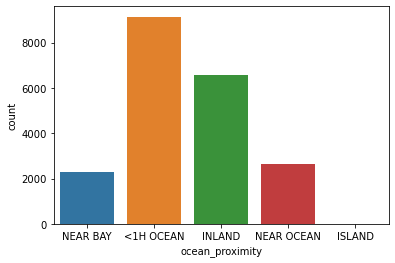

In [19]:
#plot it through seaborn library for better understanding
sns.countplot(housing_dataset.ocean_proximity)

In [20]:
#creating pandas dummie variables to convert categorical data into numerical data
new_values = pd.get_dummies(housing_dataset.ocean_proximity)

In [21]:
#show the top 5 rows of dummie dataset
new_values.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [22]:
#Join dummie dataset into housing dataset
housing_dataset[new_values.columns]=new_values

In [23]:
#show the top 5 rows of dataset after creating dummies
housing_dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  \
0         322         126         8.3252        NEAR BAY              452600   
1        2401        1138         8.3014        NEAR BAY              358500   
2         496         177         7.2574        NEAR BAY              352100   
3         558         219         5.6431        NEAR BAY              341300   
4         565         259         3.8462        NEAR BAY              342200   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0          0       0       0         1           0  
1          0       0       0         1           0  
2          0       0       0         1           0  
3          0       0       0         1           0  
4          0       0       0         1           0

In [24]:
#Remove ocean proximity colomn and include 5 dummy variables
housing_dataset = housing_dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [25]:
#show top 5 rows of housing dataset
housing_dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0         322         126         8.3252          0       0       0         1   
1        2401        1138         8.3014          0       0       0         1   
2         496         177         7.2574          0       0       0         1   
3         558         219         5.6431          0       0       0         1   
4         565         259         3.8462          0       0       0         1   

   NEAR OCEAN  median_house_value  
0           0              452600  
1           0              358500  
2           0              352100  
3           0              341300  
4           0              342200

#### 5: Data Visualization

<AxesSubplot:>

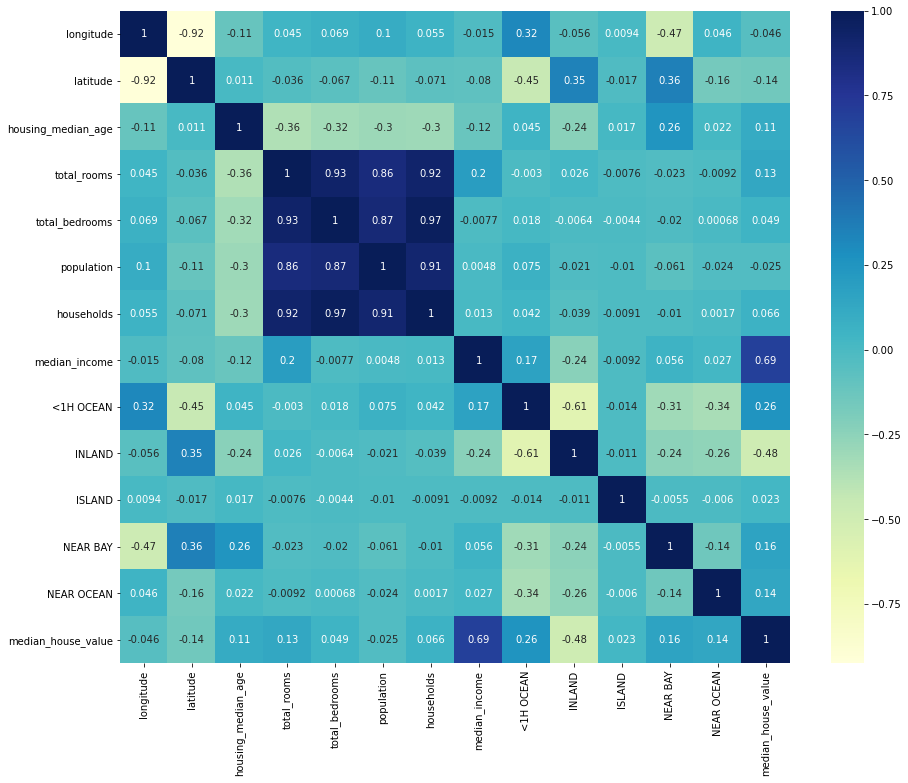

In [26]:
#To understand the correlation between all features plot heatmap of corelation
plt.figure(figsize=(15,12))
sns.heatmap(housing_dataset.corr(),cmap="YlGnBu", annot=True)  

In [27]:
#Sorting corelation values in decending order to understand top corelating colomns 
housing_dataset.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>,
        <AxesSubplot:title={'center':'NEAR BAY'}>],
       [<AxesSubplot:title={'center':'NEAR OCEAN'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

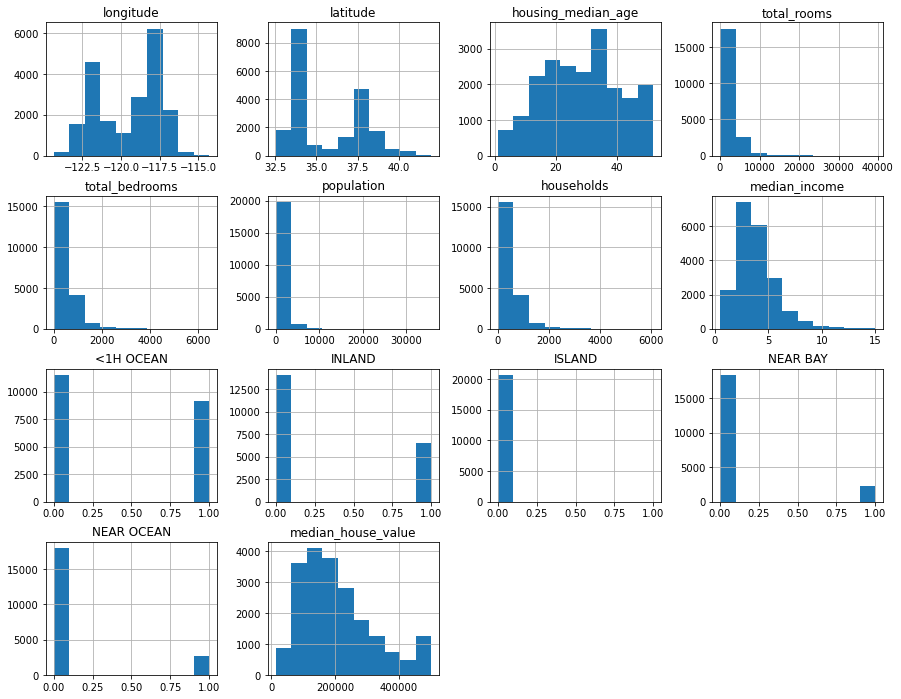

In [28]:
#to understand data distribution histogram plotted of all dataset
housing_dataset.hist(figsize=(15,12))

#### 6. Feature & Lebel Creation and Train Test Split

In [30]:
housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [31]:
#Create a feature and lebel object from the columns
Feature = housing_dataset.drop(['median_house_value'],axis=1)
Lebel = housing_dataset[['median_house_value']]

In [32]:
Feature.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0         322         126         8.3252          0       0       0         1   
1        2401        1138         8.3014          0       0       0         1   
2         496         177         7.2574          0       0       0         1   
3         558         219         5.6431          0       0       0         1   
4         565         259         3.8462          0       0       0         1   

   NEAR OCEAN  
0           0  
1           0  
2           0  
3           0  
4           0

In [33]:
Feature.shape

(20640, 13)

In [34]:
Lebel.head()

median_house_value
0              452600
1              358500
2              352100
3              341300
4              342200

In [35]:
Lebel.shape

(20640, 1)

In [36]:
#Split the dataset (by default, 75% is the training data and 25% is the testing data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(Feature,Lebel,test_size=0.20,train_size=0.80,random_state=10)

In [37]:
#Verify if the training and testing datasets are split correctly (Hint: use the shape() method)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 13)
(16512, 1)
(4128, 13)
(4128, 1)


#### 7.Standardize Dataset

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
#Standardize Train Dataset
x_train_std=sc.fit_transform(x_train)
y_train_std=sc.fit_transform(y_train)

In [40]:
x_train_std

array([[ 1.52346202, -0.85071881, -0.60284716, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.6764423 ,  1.33721733,  1.37738127, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.45214994,  0.93048561,  0.18924421, ..., -0.01740407,
        -0.35283033,  2.61400403],
       ...,
       [-1.10325072,  0.78555822, -1.79098421, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [ 0.67115105, -0.77591757,  0.50608076, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.14810919,  0.77620806, -0.99889284, ..., -0.01740407,
        -0.35283033, -0.38255488]])

In [41]:
y_train_std

array([[-0.53251627],
       [-0.7776669 ],
       [ 0.49937664],
       ...,
       [ 0.30812437],
       [-0.4907885 ],
       [-0.1334945 ]])

In [42]:
#Standardize Test Dataset
x_test_std= sc.fit_transform(x_test)
y_test_std= sc.fit_transform(y_test)

In [43]:
x_test_std

array([[ 0.18192367, -0.67849302, -1.34840706, ...,  0.        ,
        -0.35499706,  2.55057926],
       [-1.38943917,  0.9181829 , -0.14117516, ...,  0.        ,
        -0.35499706,  2.55057926],
       [ 0.88979   , -0.90928099, -1.34840706, ...,  0.        ,
        -0.35499706, -0.3920678 ],
       ...,
       [-1.40450016,  1.12071111,  0.34171759, ...,  0.        ,
         2.81692473, -0.3920678 ],
       [ 0.63375324, -0.76327227,  1.30750311, ...,  0.        ,
        -0.35499706, -0.3920678 ],
       [ 0.67391587, -0.65494323,  0.90509248, ...,  0.        ,
        -0.35499706, -0.3920678 ]])

In [44]:
y_test_std

array([[-0.35145534],
       [ 1.24681243],
       [-0.4130918 ],
       ...,
       [-0.66049372],
       [-0.99435791],
       [ 2.49581545]])

#### 8.Machine Learning Algorithm apply on dataset

In [77]:
#Create a linear regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train_std,y_train_std)

LinearRegression()

In [78]:
#Print the intercept and coefficients 
print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)

Intercept: [2.31138658e-15]
Coefficients: [[-0.47357628 -0.48092495  0.11709186 -0.09404641  0.27217959 -0.36114371
   0.2275752   0.63991328  0.05196896 -0.10749097  0.02544778  0.02321041
   0.04942312]]


In [47]:
#Predict the outcome for the testing dataset
Predicted=linreg.predict(x_test_std)
Predicted

array([[ 0.59701334],
       [ 0.62129956],
       [ 0.54720319],
       ...,
       [ 0.1900669 ],
       [-0.76140542],
       [ 1.46533825]])

#### 9: Calculate the Root Mean Square Error (RMSE)

In [48]:
#Import required libraries for calculating MSE (mean square error)
from sklearn.metrics import mean_squared_error
import numpy as np

In [49]:
#Calculate the RMSE
print(np.sqrt(mean_squared_error(y_test_std, Predicted)))

0.5940506368034364


## Bonus exercise: Perform Linear Regression with one independent variable 

In [90]:
# Feature_of_Bonus_Exercise=sc.fit_transform(Feature[['median_income']])
# Level_of_Bonus_Exercise=New_Lebel

In [55]:
x_train_bonus= sc.fit_transform(x_train[['median_income']])
y_train_bonus= y_train_std
x_test_bonus = sc.fit_transform(x_test[['median_income']])
y_test_bonus = y_test_std

In [54]:
x_train_bonus

array([[-0.70962463],
       [-0.65125171],
       [ 0.68297151],
       ...,
       [ 0.88315258],
       [-0.87633644],
       [-0.62761702]])

In [56]:
y_train_bonus

array([[-0.53251627],
       [-0.7776669 ],
       [ 0.49937664],
       ...,
       [ 0.30812437],
       [-0.4907885 ],
       [-0.1334945 ]])

In [57]:
x_test_bonus

array([[ 0.71293818],
       [ 0.03727867],
       [ 0.31517798],
       ...,
       [ 0.03991695],
       [-1.53456991],
       [ 2.03683973]])

In [58]:
y_test_bonus

array([[-0.35145534],
       [ 1.24681243],
       [-0.4130918 ],
       ...,
       [-0.66049372],
       [-0.99435791],
       [ 2.49581545]])

In [80]:
linreg.fit(x_train_bonus,y_train_bonus)

LinearRegression()

In [81]:
#Print the intercept and coefficients 
print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)

Intercept: [2.96778965e-17]
Coefficients: [[0.68739308]]


In [83]:
y_Predicted=linreg.predict(x_test_bonus)
print([y_Predicted])

[array([[ 0.49006877],
       [ 0.0256251 ],
       [ 0.21665116],
       ...,
       [ 0.02743863],
       [-1.05485274],
       [ 1.40010953]])]


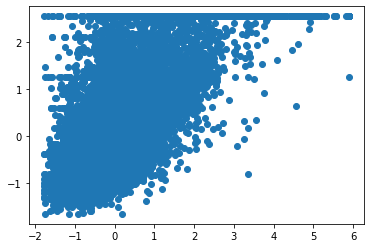

In [84]:
plt.scatter(x_train_bonus,y_train_bonus,cmap='b')

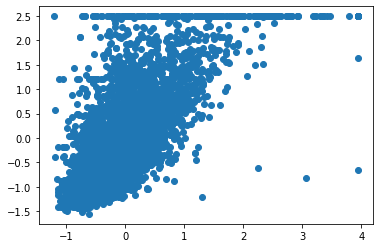

In [63]:
plt.scatter(y_Predicted,y_test_bonus,cmap='b')

# Thank You